In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
DATA_ROOT = './data/arrhythmia'
DATA_CSV = DATA_ROOT + '/arrhythmia.data'

In [6]:
#The ? are missing values, which are replaced with na when we load in the file
data = pd.read_csv(DATA_CSV, header=None, na_values='?')

In [7]:
data.info

<bound method DataFrame.info of      0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275 

In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


The dataset doesn't seem to have labels for the columns. However, the authors did provide us with a key in the file arrhythmias.names so we can refer to that as needed.

In [17]:
data_len = len(data)

for col in data.columns:
    nan_count = data[col].isnull().sum()
    print('Number of NaN in column {}:\t{}\t({:.2f}%)'.format(col, nan_count, nan_count/data_len*100))

Number of NaN in column 0:	0	(0.00%)
Number of NaN in column 1:	0	(0.00%)
Number of NaN in column 2:	0	(0.00%)
Number of NaN in column 3:	0	(0.00%)
Number of NaN in column 4:	0	(0.00%)
Number of NaN in column 5:	0	(0.00%)
Number of NaN in column 6:	0	(0.00%)
Number of NaN in column 7:	0	(0.00%)
Number of NaN in column 8:	0	(0.00%)
Number of NaN in column 9:	0	(0.00%)
Number of NaN in column 10:	8	(1.77%)
Number of NaN in column 11:	22	(4.87%)
Number of NaN in column 12:	1	(0.22%)
Number of NaN in column 13:	376	(83.19%)
Number of NaN in column 14:	1	(0.22%)
Number of NaN in column 15:	0	(0.00%)
Number of NaN in column 16:	0	(0.00%)
Number of NaN in column 17:	0	(0.00%)
Number of NaN in column 18:	0	(0.00%)
Number of NaN in column 19:	0	(0.00%)
Number of NaN in column 20:	0	(0.00%)
Number of NaN in column 21:	0	(0.00%)
Number of NaN in column 22:	0	(0.00%)
Number of NaN in column 23:	0	(0.00%)
Number of NaN in column 24:	0	(0.00%)
Number of NaN in column 25:	0	(0.00%)
Number of NaN in c

Columns 11, 12, 13, 14, and 15 (Python zero indexes) are the only ones with NaN values. Normally, I'd recommend imputing values using one of several methods, but for column 14 it would be rather tricky to properly impute values when only 16.81% of the values are present. As such, I'll just drop the column for now. The columns above are T, P, QRST, J, and Heart Rate, respectively.

## Impution and Interpolation: A Quick Analysis
As a demonstration of the effects of the more common methods of imputation and plot the data. You wouldn't normally impute values when such a small number of values are present in the dataset, but this will nicely over-emphasize the effects that different imputation methods have on the distributions.

In [52]:
col_13 = data[13]
print("Mean: ", col_13.mean())
print("Median: ", col_13.median())
print("Std Dev: ", col_13.std())

Mean:  -13.592105263157896
Median:  -50.5
Std Dev:  127.22024761612741


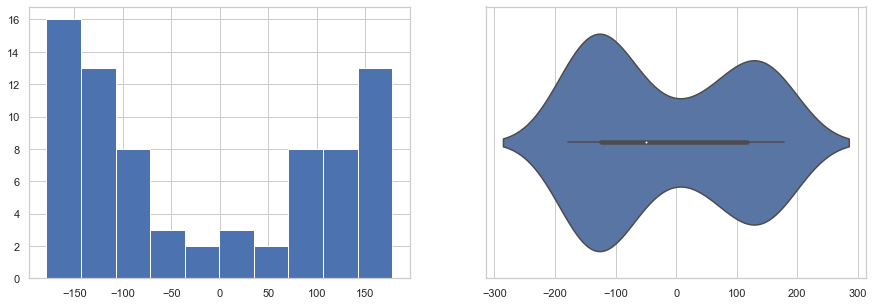

In [44]:
sns.set(style="whitegrid")

f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13.hist()

plt.subplot(1, 2, 2)
values = col_13.values
ax = sns.violinplot(x=values)

First we will examine the Back Fill and Forward Fill options native to pandas DataFrames. These work by either using the previous non-NaN value in the column as the value that all the following NaN's are replaced with or the next non-NaN value to replace all previous NaN's.

In [51]:
col_13_bf = col_13.fillna(method='bfill')
print("Mean: ", col_13_bf.mean())
print("Median: ", col_13_bf.median())
print("Std Dev: ", col_13_bf.std())

Mean:  3.940133037694013
Median:  -18.0
Std Dev:  124.95323021561144


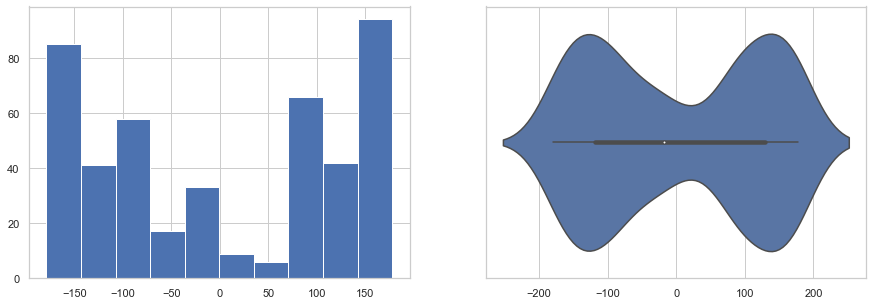

In [43]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_bf.hist()

plt.subplot(1, 2, 2)
values = col_13_bf.values
ax = sns.violinplot(x=values)

In [50]:
col_13_ff = col_13.fillna(method='ffill')
print("Mean: ", col_13_ff.mean())
print("Median: ", col_13_ff.median())
print("Std Dev: ", col_13_ff.std())

Mean:  -12.706666666666667
Median:  -39.0
Std Dev:  123.64686118387158


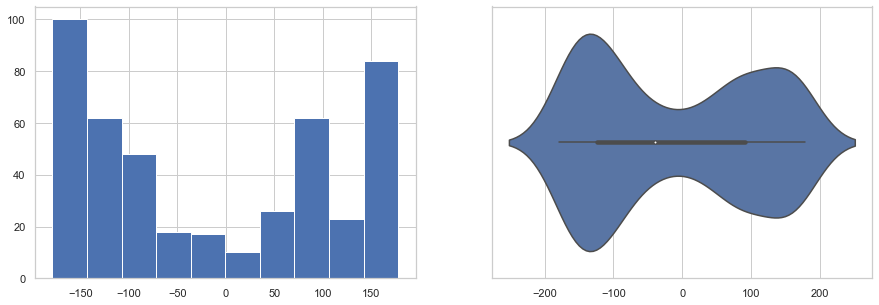

In [46]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_ff.hist()

plt.subplot(1, 2, 2)
values = col_13_ff.values
ax = sns.violinplot(x=values)

Looking at the three sets of charts above, we can see that the choice of fill has a very large effect on how the distributions look. The standard deviations don't change much between the baseline and the imputation methods, but the mean and medians shift quite a bit!
<br><br>
Next we will look at imputing the mean and median for the missing values and see how this changes the distributions. These methods simply replace all NaN's with the mean or median of the column. Before reading on, what will happen to the mean and median if we replace all of the NaN's with the mean? with the median?

In [60]:
col_13_mean = col_13.fillna(value=col_13.mean())
print("Mean: ", col_13_mean.mean())
print("Median: ", col_13_mean.median())
print("Std Dev: ", col_13_mean.std())

Mean:  -13.592105263157897
Median:  -13.592105263157896
Std Dev:  51.87983632814333


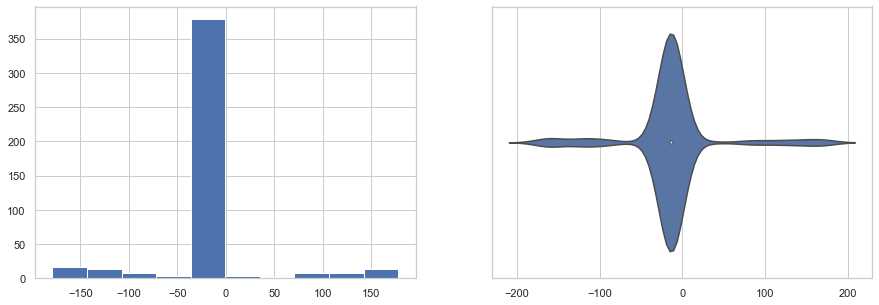

In [61]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_mean.hist()

plt.subplot(1, 2, 2)
values = col_13_mean.values
ax = sns.violinplot(x=values)

In [62]:
col_13_median = col_13.fillna(value=col_13.median())
print("Mean: ", col_13_median.mean())
print("Median: ", col_13_median.median())
print("Std Dev: ", col_13_median.std())

Mean:  -44.29424778761062
Median:  -50.5
Std Dev:  53.688637226904405


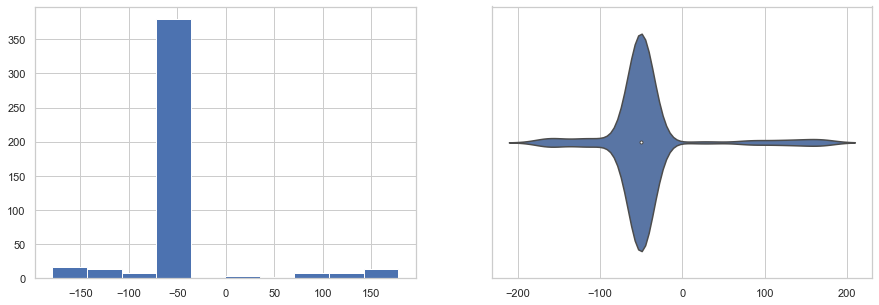

In [63]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_median.hist()

plt.subplot(1, 2, 2)
values = col_13_median.values
ax = sns.violinplot(x=values)

The changes are markedly different from the fills we looked at above! When we imputed the mean, the mean didn't change compared to the baseline and when we imputed the median, the median didn't change compared to the baseline. However, the standard deviation decreased significantly. Let's take a moment to ponder why. Every entry in the column is being replaced with the exact same value, thus there is less variance in the values in the dataset which means the standard deviation is lower.
<br><br>
Next we will look at some more advanced methods of imputing values, technically called interpolating. These will also use methods native to pandas DataFrames, namely linear, quadratic (since the distribution of the baseline shows a quadratic like shape this should be a good choice, right?), and akima.

In [54]:
col_13_lin = col_13.interpolate(method='linear')
print("Mean: ", col_13_lin.mean())
print("Median: ", col_13_lin.median())
print("Std Dev: ", col_13_lin.std())

Mean:  -4.315555555555554
Median:  -7.100000000000001
Std Dev:  92.27125933737385


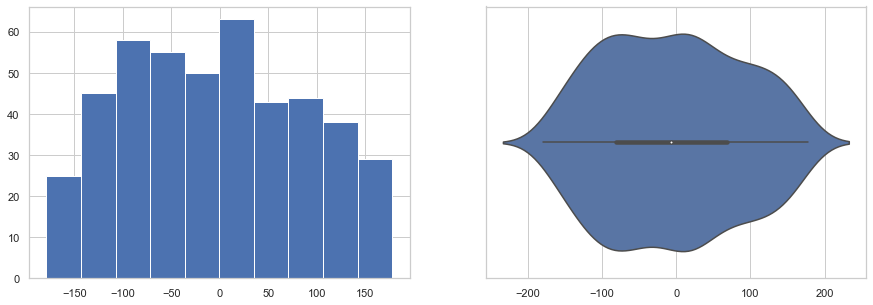

In [55]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_lin.hist()

plt.subplot(1, 2, 2)
values = col_13_lin.values
ax = sns.violinplot(x=values)

In [56]:
col_13_quad = col_13.interpolate(method='quadratic')
print("Mean: ", col_13_quad.mean())
print("Median: ", col_13_quad.median())
print("Std Dev: ", col_13_quad.std())

Mean:  27.416908671499222
Median:  17.494543500724166
Std Dev:  187.26920338864994


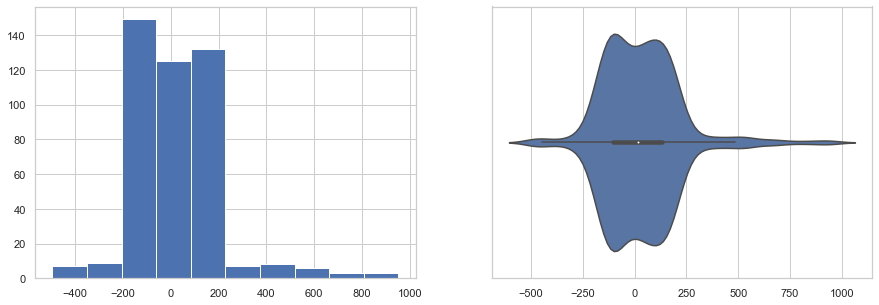

In [57]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_quad.hist()

plt.subplot(1, 2, 2)
values = col_13_quad.values
ax = sns.violinplot(x=values)

In [58]:
col_13_akima = col_13.interpolate(method='akima')
print("Mean: ", col_13_akima.mean())
print("Median: ", col_13_akima.median())
print("Std Dev: ", col_13_akima.std())

Mean:  -3.323043554043639
Median:  -8.934712653650834
Std Dev:  104.99688534313094


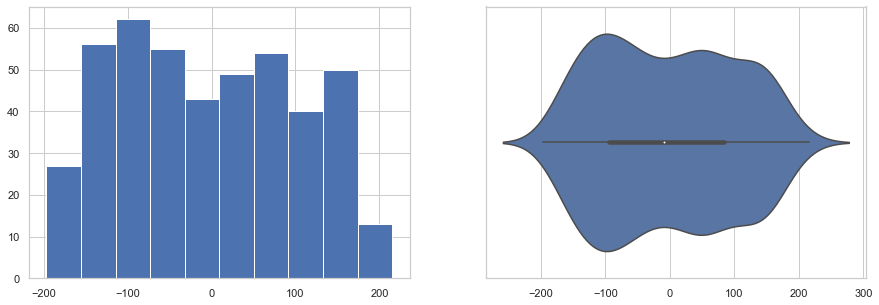

In [59]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_akima.hist()

plt.subplot(1, 2, 2)
values = col_13_akima.values
ax = sns.violinplot(x=values)

So these results are very different from the results we saw for the fill and mean/median imputation methods! Again we see a lot of difference between the central tendancies compared to the baseline AND a lot of difference between the standard deviations compared to the baseline. The problem with using these interpolation methods in this context is that they are dependent on the index of the Series or DataFrame and because this dataset is not ordered, this is an issue. Now, this isn't to say that interpolation shouldn't be used! But it should be used with the proper dataset, as it is a powerful tool.
<br><br>
It's possible to do regression, or classification, to fit a model to other variables in the dataset in order to try and predict the missing values. The model of choice can be anything from a simple linear regression model to a neural network if you so desired! Because there are only 76 variables, a linear regression model might work, but a more data hungry model will likely be unable to fit the distribution well enough to be useful.

## Cleaning, Analysis, and Visualization

In [64]:
#To come tomorrow!